<a href="https://colab.research.google.com/github/Nashra-Tazmeen/Botnet-Detection/blob/main/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

**Data** **Loading**

In [ ]:
file_path = '/content/drive/My Drive/Datasets.csv'
df = pd.read_csv(file_path)

In [ ]:
df.isnull().sum()

ID                    0
Sender_IP             0
Sender_Port           0
Target_IP             0
Target_Port           0
Transport_Protocol    0
Duration              0
AvgDuration           0
PBS                   0
AvgPBS                0
TBS                   0
PBR                   0
AvgPBR                0
TBR                   0
Missed_Bytes          0
Packets_Sent          0
Packets_Received      0
SRPR                  0
class                 0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5472 non-null   object 
 1   Sender_IP           5472 non-null   object 
 2   Sender_Port         5472 non-null   int64  
 3   Target_IP           5472 non-null   object 
 4   Target_Port         5472 non-null   int64  
 5   Transport_Protocol  5472 non-null   int64  
 6   Duration            5472 non-null   float64
 7   AvgDuration         5472 non-null   float64
 8   PBS                 5472 non-null   int64  
 9   AvgPBS              5472 non-null   float64
 10  TBS                 5472 non-null   int64  
 11  PBR                 5472 non-null   int64  
 12  AvgPBR              5472 non-null   float64
 13  TBR                 5472 non-null   int64  
 14  Missed_Bytes        5472 non-null   int64  
 15  Packets_Sent        5472 non-null   int64  
 16  Packet

In [ ]:
df.describe()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5.472000e+03,5472.000000,5.472000e+03,5.472000e+03,5.472000e+03,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,16649.802997,3544.247259,1.389072,12.964750,21.341809,317.964547,7.298220e+02,759.547332,1.300414e+04,1.322517e+04,1.315962e+04,462.317069,10.211075,11.732822,0.711110,0.629934
std,18265.060508,9404.524921,0.487584,305.059762,883.079233,3732.302430,1.863939e+04,6924.407943,1.847461e+05,1.312337e+05,1.880511e+05,17168.330107,104.135551,111.630205,0.601317,0.482866
min,53.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2690.000000,53.000000,1.000000,0.050000,0.218569,0.000000,2.875000e+01,80.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4840.500000,80.000000,1.000000,0.480000,1.500000,49.000000,5.604888e+01,120.000000,1.010000e+02,1.892578e+02,1.240000e+02,0.000000,2.000000,1.000000,0.833333,1.000000
75%,32245.000000,139.000000,2.000000,3.060000,7.583472,103.000000,1.414228e+02,361.250000,6.792500e+02,3.805434e+03,8.380000e+02,0.000000,6.000000,5.000000,1.000000,1.000000
max,65522.000000,65500.000000,2.000000,22083.710000,65178.233330,156289.000000,1.062472e+06,325674.000000,8.986288e+06,6.142982e+06,9.231445e+06,864072.000000,6561.000000,6510.000000,8.000000,1.000000


**Preprocessing**

# Correlation matrix

<ipython-input-7-3e25f2fd1146>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


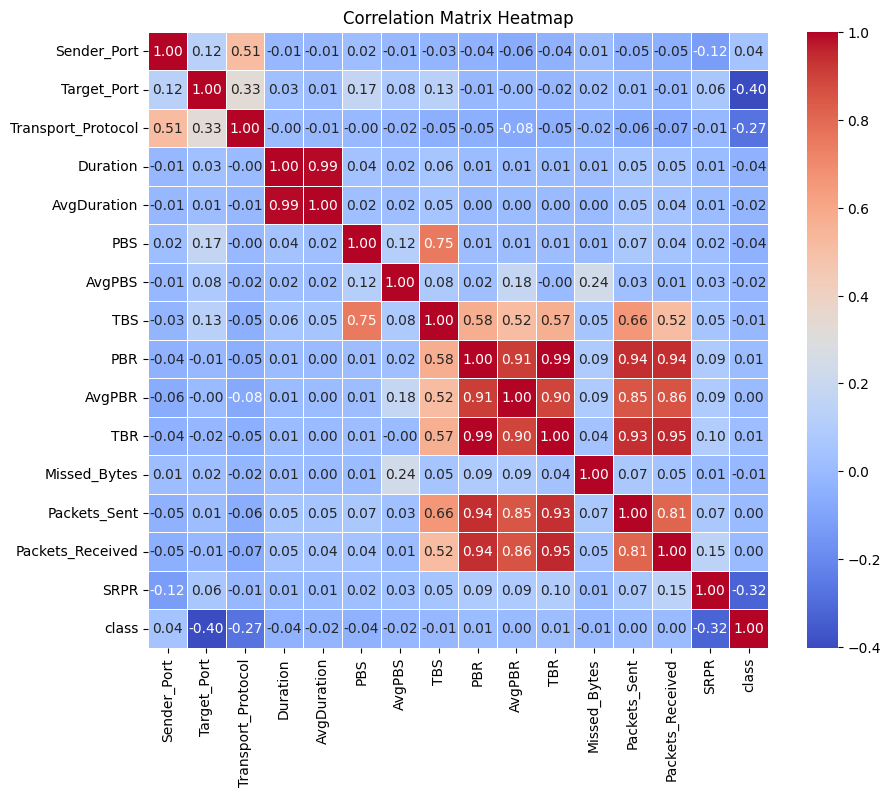

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-8-4acf37b79814>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr()


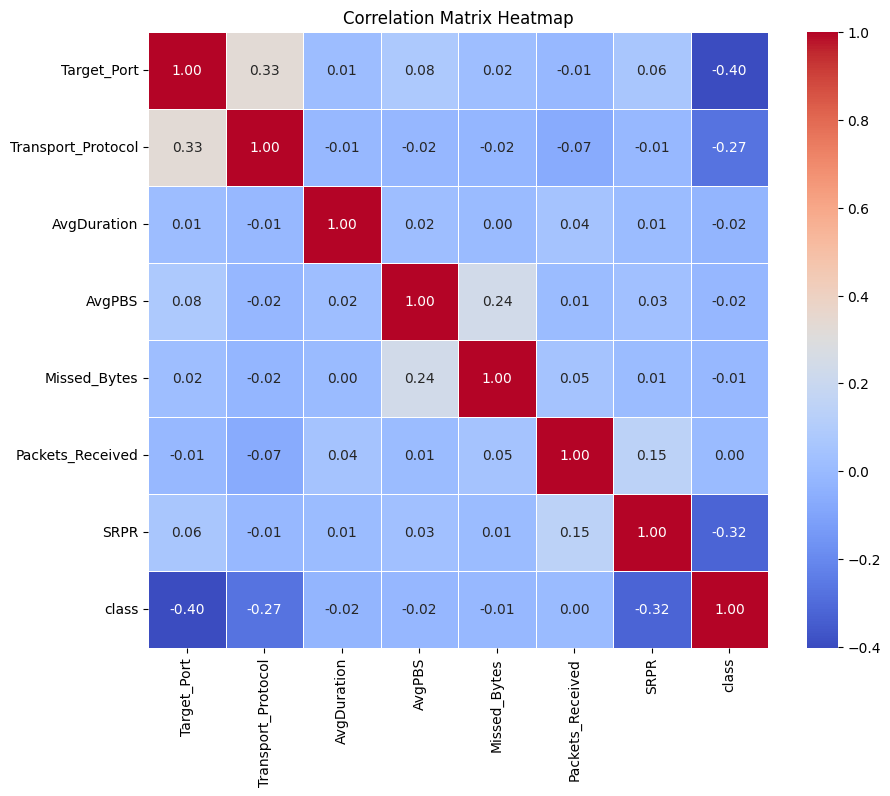

In [ ]:
df_new = df.drop(columns = ['Duration','PBS','PBR','AvgPBR','TBR','Packets_Sent','Sender_Port','TBS'])
correlation_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,:-1], df_new.iloc[:,-1], test_size = 0.2)

In [ ]:
numerical_transformer = Pipeline([
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline([
    ('impute', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

numerical_columns = df_new.select_dtypes(include = ['int64', 'float64']).columns
categorical_columns = df_new.select_dtypes(include = ['object', 'category']).columns

numerical_colums = numerical_columns.drop(['class'])

preprocessor = ColumnTransformer(transformers = [
    ('num',numerical_transformer,numerical_colums),
    ('cat',categorical_transformer,categorical_columns)
], remainder = 'passthrough')

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=500))
])


X_preprocessed = pipeline.fit_transform(X_train)
y_preprocessed = y_train

In [ ]:
X_preprocessed.shape

(4377, 500)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
models = {
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    # 'GradientBoostingClassifier':GradientBoostingClassifier(),
    # 'AdaBoostClassifier':AdaBoostClassifier(),
    # 'SVC':SVC(),
    # 'KNeighborsClassifier':KNeighborsClassifier(),
    # 'DecisionTreeClassifier':DecisionTreeClassifier(),
    # 'GaussianNB':GaussianNB()
}

params = {
    'LogisticRegression':{},
    'RandomForestClassifier' : {
        # 'n_estimators' : [100, 200, 500]
    },
    'XGBClassifier':{
        # 'n_estimators': [100, 200 , 500],
        # 'learning_rate': [0.01, 0.1, 0.3],
        # 'max_depth': [3, 6, 10]
    },
    # 'GradientBoostingClassifier':{},
    # 'AdaBoostClassifier':{},
    # 'SVC':{},
    # 'KNeighborsClassifier':{},
    # 'DecisionTreeClassifier':{},
    # 'GaussianNB':{}
}
grids = {}
for model_name, model in models.items():
    grids[model_name] = GridSearchCV(
        estimator = model,
        param_grid = params[model_name],
        cv = 3,
        scoring = 'accuracy',
        n_jobs = -1
    )
    grids[model_name].fit(X_preprocessed,y_preprocessed)
    best_params = grids[model_name].best_params_
    best_score = grids[model_name].best_score_

    print(f'Best parameters for {model_name} are {best_params}')
    print(f'Best Accuracy for {model_name} is {best_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for LogisticRegression are {}
Best Accuracy for LogisticRegression is 0.9138679460817912
Best parameters for RandomForestClassifier are {}
Best Accuracy for RandomForestClassifier is 0.9031299977153301
Best parameters for XGBClassifier are {}
Best Accuracy for XGBClassifier is 0.8976467900388393


# Preprocess Test Data

In [ ]:
X_test_preprocessed = pipeline.transform(X_test)
y_test_preprocessed = y_test

# Evaluation

In [ ]:
def show_metrics(model,name,X,y):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)[:, 1]
  print("Classification Report:", name)
  print(classification_report(y, y_pred))
  print("ROC-AUC curve:")
  # Predict probabilities of positive class (class 1) for the test set


  # Compute ROC curve and AUC
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

Classification Report: LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       422
           1       0.92      0.93      0.93       673

    accuracy                           0.91      1095
   macro avg       0.91      0.91      0.91      1095
weighted avg       0.91      0.91      0.91      1095

ROC-AUC curve:


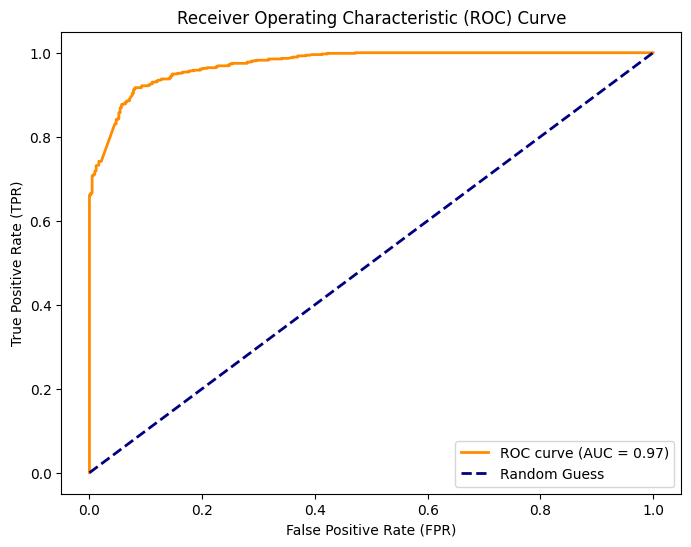

Classification Report: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       422
           1       0.92      0.94      0.93       673

    accuracy                           0.92      1095
   macro avg       0.91      0.91      0.91      1095
weighted avg       0.91      0.92      0.91      1095

ROC-AUC curve:


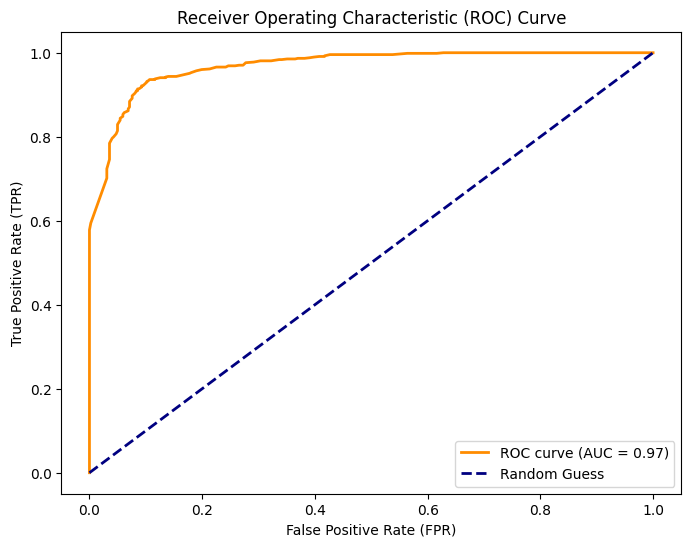

Classification Report: XGBClassifier
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       422
           1       0.91      0.94      0.92       673

    accuracy                           0.91      1095
   macro avg       0.90      0.90      0.90      1095
weighted avg       0.91      0.91      0.91      1095

ROC-AUC curve:


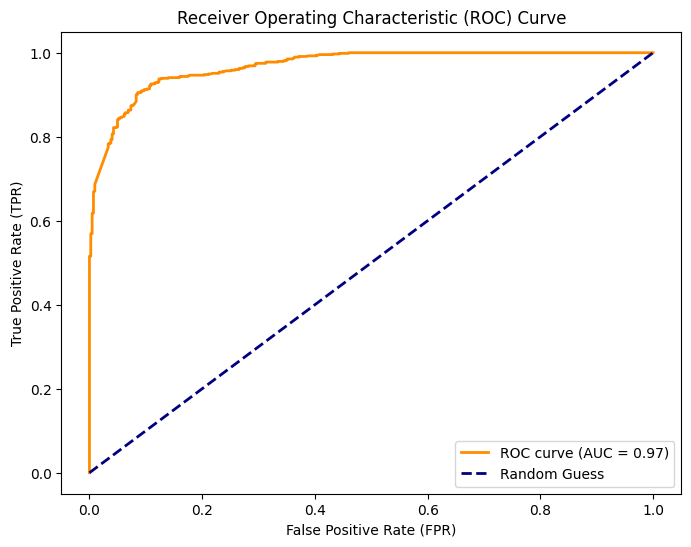

In [ ]:
for name,model in grids.items():
  show_metrics(model,name,X_test_preprocessed,y_test_preprocessed)